In [1]:
import xarray as xr
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def FilterZeroScores(path):
    reigon = path[path.find('Region')+6]
    data = xr.open_dataset(path)
    cape = data['cape']
    vrt = data['vrt']
    frt = data['frt']
    
    #for each combination find where neither metric is zero
    cf0 = np.where(np.logical_and(cape.values>0, frt.values>0))[0]
    cv0 = np.where(np.logical_and(cape.values>0, vrt.values>0))[0]
    fv0 = np.where(np.logical_and(frt.values>0, vrt.values>0))[0]
    
    #create a pandas dataframe for each combination separately
    cf0_pd = pd.DataFrame({'cape':cape.values[cf0],'frt':frt.values[cf0]})
    cv0_pd = pd.DataFrame({'cape':cape.values[cv0],'vrt':vrt.values[cv0]})
    fv0_pd = pd.DataFrame({'vrt':vrt.values[fv0],'frt':frt.values[fv0]})
    
    plot_name = path[path.find('Region'):path.find('.nc')]
    
    sns.set_theme(style="white")

    g = sns.PairGrid(cf0_pd, diag_sharey=False)
    g.map_upper(sns.histplot,binwidth=4)
    g.map_lower(sns.kdeplot,bw_adjust=0.75)
    g.map_diag(sns.histplot, binwidth=4)
    g.fig.suptitle(plot_name+' | CAPE & Front')
    g.fig.savefig('./Figures/2x2/'+plot_name+'_CapeFront.png')
    plt.close(g.fig)
    
    g = sns.PairGrid(cv0_pd, diag_sharey=False)
    g.map_upper(sns.histplot,binwidth=4)
    g.map_lower(sns.kdeplot,bw_adjust=0.75)
    g.map_diag(sns.histplot, binwidth=4)
    g.fig.suptitle(plot_name+' | CAPE & Vort')
    g.fig.savefig('./Figures/2x2/'+plot_name+'_CapeVort.png')
    plt.close(g.fig)
    
    g = sns.PairGrid(fv0_pd, diag_sharey=False)
    g.map_upper(sns.histplot,binwidth=4)
    g.map_lower(sns.kdeplot,bw_adjust=0.75)
    g.map_diag(sns.histplot, binwidth=4)
    g.fig.suptitle(plot_name+' | Front & Vort')
    g.fig.savefig('./Figures/2x2/'+plot_name+'_FrontVort.png')
    plt.close(g.fig)
    
    return

In [8]:
region = 4
seasons = ['DJF','MAM','JJA','SON']

for region in tqdm([1,2,3,4,5,6,7]):
    for season in [0,1,2,3]:
        path = './DistBySeason/MetricScores_CapeVrtFrt_Region'+str(region)+'_'+seasons[season]+'.nc'
        data = xr.open_dataset(path)
        cape = data['cape']
        vrt = data['vrt']
        frt = data['frt']

        df1 = pd.DataFrame({'cape':cape.values,'vrt':vrt.values,'frt':frt.values})

        sns.set_theme(style="white")

        g = sns.PairGrid(df1, diag_sharey=False)
        g.map_upper(sns.histplot,binwidth=4)
        g.map_lower(sns.kdeplot,bw_adjust=0.75)
        g.map_diag(sns.histplot, lw=2)
        g.fig.suptitle('Region '+str(region)+' | '+seasons[season])
        g.fig.savefig('./Figures/Region'+str(region)+'_'+seasons[season]+'_PairGrid.png')
        plt.close(g.fig)
        
        FilterZeroScores(path)
        
    for hour in [0,3,6,9,12,15,18,21]:
        path = './DistByTime/MetricScores_CapeVrtFrt_Region'+str(region)+'_Hour'+str(hour)+'.nc'
        data = xr.open_dataset(path)
        cape = data['cape']
        vrt = data['vrt']
        frt = data['frt']

        df1 = pd.DataFrame({'cape':cape.values,'vrt':vrt.values,'frt':frt.values})

        sns.set_theme(style="white")

        g = sns.PairGrid(df1, diag_sharey=False)
        g.map_upper(sns.histplot,binwidth=4)
        g.map_lower(sns.kdeplot,bw_adjust=0.75)
        g.map_diag(sns.histplot, lw=2)
        g.fig.suptitle('Region '+str(region)+' | Hour '+str(hour))
        g.fig.savefig('./Figures/Region'+str(region)+'_Hour'+str(hour)+'_PairGrid.png')
        plt.close(g.fig)
        
        FilterZeroScores(path)
        
    for season in [0,1,2,3]:
        for hour in [0,3,6,9,12,15,18,21]:
            path = './DistByTimeAndSeason/MetricScores_CapeVrtFrt_Region'+str(region)+'_'+seasons[season]+'_Hour'+str(hour)+'.nc'
            data = xr.open_dataset(path)
            cape = data['cape']
            vrt = data['vrt']
            frt = data['frt']

            df1 = pd.DataFrame({'cape':cape.values,'vrt':vrt.values,'frt':frt.values})

            sns.set_theme(style="white")

            g = sns.PairGrid(df1, diag_sharey=False)
            g.map_upper(sns.histplot,binwidth=4)
            g.map_lower(sns.kdeplot,bw_adjust=0.75)
            g.map_diag(sns.histplot, lw=2)
            g.fig.suptitle('Region '+str(region)+' | '+seasons[season]+' | Hour '+str(hour))
            g.fig.savefig('./Figures/Region'+str(region)+'_'+seasons[season]+'_Hour'+str(hour)+'_PairGrid.png')
            plt.close(g.fig)
            
            FilterZeroScores(path)

100%|████████████████████████████████████████████| 7/7 [55:40<00:00, 477.16s/it]


In [5]:
seasons=['DJF','MAM','JJA','SON']

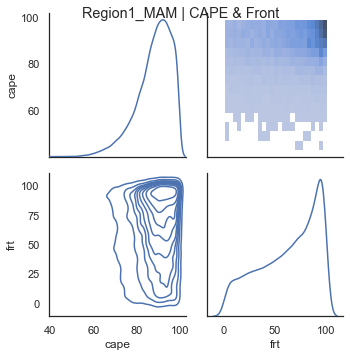

In [6]:
region = 1
season = 1
FilterZeroScores('./DistBySeason/MetricScores_CapeVrtFrt_Region'+str(region)+'_'+seasons[season]+'.nc')

In [ ]:
def ThreeInOne(path):
    data = xr.open_dataset(path)
    cape = data['cape']
    vrt = data['vrt']
    frt = data['frt']
    
    plt.figure()
    c = plt.scatter(frt.values,vrt.values,c=cape.values,cmap = 'seismic')
    plt.xlabel("Front")
    plt.ylabel("Vort")
    plt.colorbar(c,label='CAPE')
    plt.show()
    
    return

ThreeInOne('./DistBySeason/MetricScores_CapeVrtFrt_Region'+str(region)+'_'+seasons[season]+'.nc')

Text(0.5, 0.98, 'Region 1 | MAM')

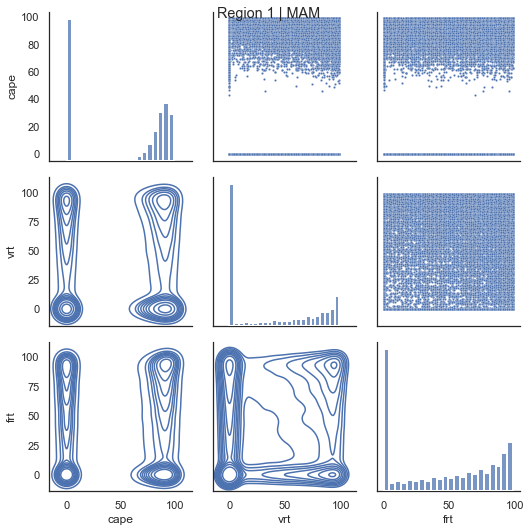